# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [6]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [9]:
# Try loading one file

df = pd.read_parquet('/content/drive/MyDrive/ass/EDA DATASHEET NYC Taxi/trip_record/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [10]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/content/drive/MyDrive/ass/EDA DATASHEET NYC Taxi/trip_record')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)



        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        monthly_sample_data = pd.DataFrame()
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

            # Iterate through each hour of the selected date
        for date in monthly_data['date'].unique():
          df_date = monthly_data[monthly_data['date'] == date]
          for hour in range(24):
            df_hour = df_date[df_date['hour'] == hour]

                # Sample 5% of the hourly data randomly
            if not df_hour.empty:
              monthly_sample_data = df_hour.sample(frac = 0.05, random_state = 42)

                # add data of this hour to the dataframe
              sampled_data = pd.concat([sampled_data, monthly_sample_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe

        df = pd.concat([df, sampled_data],ignore_index=True) # we initialised this empty DF earlier

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [13]:
# Store the df in csv/parquet
df.to_csv('/content/drive/MyDrive/ass/combinedfile')

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [14]:
# Load the new data file
df = pd.read_csv(r'/content/drive/MyDrive/ass/combinedfile')
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [15]:
 df.info()
 df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        float64
 5   trip_distance          float64
 6   RatecodeID             float64
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  date                   object 
 21  hour                   int64  
 22  Airport_fee       

(1896400, 23)

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [16]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,date,hour,Airport_fee
0,0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1.0,7.74,1.0,N,138,256,...,0.5,0.00,0.0,1.0,41.15,0.0,1.25,2023-01-01,0,NaN
1,1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2.0,1.24,1.0,N,161,237,...,0.5,2.58,0.0,1.0,15.48,2.5,0.00,2023-01-01,0,NaN
2,2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3.0,1.44,1.0,N,237,141,...,0.5,0.00,0.0,1.0,16.40,2.5,0.00,2023-01-01,0,NaN
3,3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1.0,0.54,1.0,N,143,142,...,0.5,0.00,0.0,1.0,11.50,2.5,0.00,2023-01-01,0,NaN
4,4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,NaN,19.24,NaN,NaN,66,107,...,0.5,5.93,0.0,1.0,35.57,NaN,NaN,2023-01-01,0,NaN


In [17]:
df['RatecodeID'] = df['RatecodeID'].astype('Int64')
df['passenger_count'] = df['passenger_count'].astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   tpep_pickup_datetime   object 
 3   tpep_dropoff_datetime  object 
 4   passenger_count        Int64  
 5   trip_distance          float64
 6   RatecodeID             Int64  
 7   store_and_fwd_flag     object 
 8   PULocationID           int64  
 9   DOLocationID           int64  
 10  payment_type           int64  
 11  fare_amount            float64
 12  extra                  float64
 13  mta_tax                float64
 14  tip_amount             float64
 15  tolls_amount           float64
 16  improvement_surcharge  float64
 17  total_amount           float64
 18  congestion_surcharge   float64
 19  airport_fee            float64
 20  date                   object 
 21  hour                   int64  
 22  Airport_fee       

In [18]:
#droping the date
df.drop('date',axis=1,inplace=True)
df.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,hour,Airport_fee
0,0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,N,138,256,...,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,0,NaN
1,1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,N,161,237,...,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,0,NaN
2,2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,N,237,141,...,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,0,NaN
3,3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,N,143,142,...,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,0,NaN
4,4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,NaN,66,107,...,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,0,NaN


In [19]:
#dropping the time
df.drop('hour',axis=1,inplace=True)
df.drop('Unnamed: 0',axis=1,inplace=True)
df.drop('store_and_fwd_flag',axis=1,inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,Airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25,NaN
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00,NaN
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00,NaN
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00,NaN
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN,NaN


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [20]:
# Combine the two airport fee columns

df['combined_airport_fee']= df[['airport_fee','Airport_fee']].max(axis=1)
df.drop(['airport_fee','Airport_fee'],axis=1,inplace=True)
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,combined_airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [21]:
# check where values of fare amount are negative

df[df['fare_amount']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,combined_airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [22]:
# Analyse RatecodeID for the negative fare amounts
print(df[df['fare_amount']<0]['RatecodeID'].value_counts())


Series([], Name: count, dtype: Int64)


In [23]:
# Find which columns have negative values
colums_with_numbers = df.select_dtypes(include='number')
negative_values = (colums_with_numbers < 0).any()
negative_columns = negative_values[negative_values].index.tolist()
print("negative value columns:", negative_columns)

negative value columns: ['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'combined_airport_fee']


In [24]:
# fix these negative values
for col in negative_columns: # Replace negative values with 0
    df.loc[df[col] < 0, col] = 0
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   tpep_pickup_datetime   object 
 2   tpep_dropoff_datetime  object 
 3   passenger_count        Int64  
 4   trip_distance          float64
 5   RatecodeID             Int64  
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  combined_airport_fee   float64
dtypes: Int64(2), float64(10), int64(4), object(2)
memory usage: 264.0+ MB


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,combined_airport_fee
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,7.74,1,138,256,2,32.40,6.0,0.5,0.00,0.0,1.0,41.15,0.0,1.25
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,1.24,1,161,237,1,7.90,1.0,0.5,2.58,0.0,1.0,15.48,2.5,0.00
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,1.44,1,237,141,2,11.40,1.0,0.5,0.00,0.0,1.0,16.40,2.5,0.00
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.54,1,143,142,2,6.50,1.0,0.5,0.00,0.0,1.0,11.50,2.5,0.00
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,66,107,0,25.64,0.0,0.5,5.93,0.0,1.0,35.57,NaN,NaN


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [25]:
# Find the proportion of missing values in each column
df.isna().mean()*100


,0
VendorID,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
passenger_count,3.420903
trip_distance,0.000000
RatecodeID,3.420903
PULocationID,0.000000
DOLocationID,0.000000
payment_type,0.000000
fare_amount,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [26]:
# Display the rows with null values
df[df.isnull().any(axis=1)]


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,combined_airport_fee
4,2,2023-01-01 00:43:00,2023-01-01 01:01:00,<NA>,19.24,<NA>,66,107,0,25.64,0.0,0.5,5.93,0.00,1.0,35.57,NaN,NaN
15,2,2023-01-01 00:41:50,2023-01-01 01:14:50,<NA>,10.77,<NA>,151,106,0,45.38,0.0,0.5,11.19,6.55,1.0,67.12,NaN,NaN
42,2,2023-01-01 00:37:21,2023-01-01 00:54:18,<NA>,4.52,<NA>,114,262,0,25.38,0.0,0.5,0.00,0.00,1.0,29.38,NaN,NaN
43,2,2023-01-01 00:44:03,2023-01-01 01:13:49,<NA>,9.19,<NA>,239,256,0,40.00,0.0,0.5,2.20,0.00,1.0,46.20,NaN,NaN
46,2,2023-01-01 00:50:55,2023-01-01 01:19:06,<NA>,2.74,<NA>,90,48,0,18.48,0.0,0.5,3.37,0.00,1.0,25.85,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1896375,2,2023-12-31 23:09:34,2023-12-31 23:36:00,<NA>,4.10,<NA>,140,249,0,23.47,0.0,0.5,0.00,0.00,1.0,27.47,NaN,NaN
1896379,2,2023-12-31 23:05:26,2023-12-31 23:18:01,<NA>,3.24,<NA>,229,239,0,17.33,0.0,0.5,0.00,0.00,1.0,21.33,NaN,NaN
1896390,2,2023-12-31 23:38:22,2024-01-01 00:02:48,<NA>,8.38,<NA>,244,137,0,34.93,0.0,0.5,0.00,0.00,1.0,38.93,NaN,NaN
1896392,2,2023-12-31 23:35:59,2023-12-31 23:39:21,<NA>,0.76,<NA>,141,140,0,6.83,0.0,0.5,0.00,0.00,1.0,10.83,NaN,NaN


In [27]:
# Impute NaN values in 'passenger_count'
df['passenger_count'].fillna(df['passenger_count'].mode()[0], inplace=True)
print(df['passenger_count'].isna().sum())

0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [28]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0],inplace=True)

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [29]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].fillna(df['congestion_surcharge'].median(),inplace=True)
print(df['congestion_surcharge'].isnull().sum())
print(df.isna().mean()*100)

0
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.000000
trip_distance            0.000000
RatecodeID               0.000000
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.000000
combined_airport_fee     3.420903
dtype: float64


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [30]:
# Handle any remaining missing values
#df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0],inplace=True)
df['combined_airport_fee'].fillna(0,inplace=True)


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

           VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
count  1.896400e+06        1896400.0   1.896400e+06   1896400.0  1.896400e+06   
mean   1.733026e+00         1.356585   3.858293e+00    1.612981  1.652814e+02   
std    4.476401e-01         0.879916   1.294085e+02    7.267261  6.400038e+01   
min    1.000000e+00              0.0   0.000000e+00         1.0  1.000000e+00   
25%    1.000000e+00              1.0   1.050000e+00         1.0  1.320000e+02   
50%    2.000000e+00              1.0   1.790000e+00         1.0  1.620000e+02   
75%    2.000000e+00              1.0   3.400000e+00         1.0  2.340000e+02   
max    6.000000e+00              9.0   1.263605e+05        99.0  2.650000e+02   

       DOLocationID  payment_type   fare_amount         extra       mta_tax  \
count  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06  1.896400e+06   
mean   1.640515e+02  1.163817e+00  1.991935e+01  1.588020e+00  4.952989e-01   
std    6.980207e+01  5.081384e-01

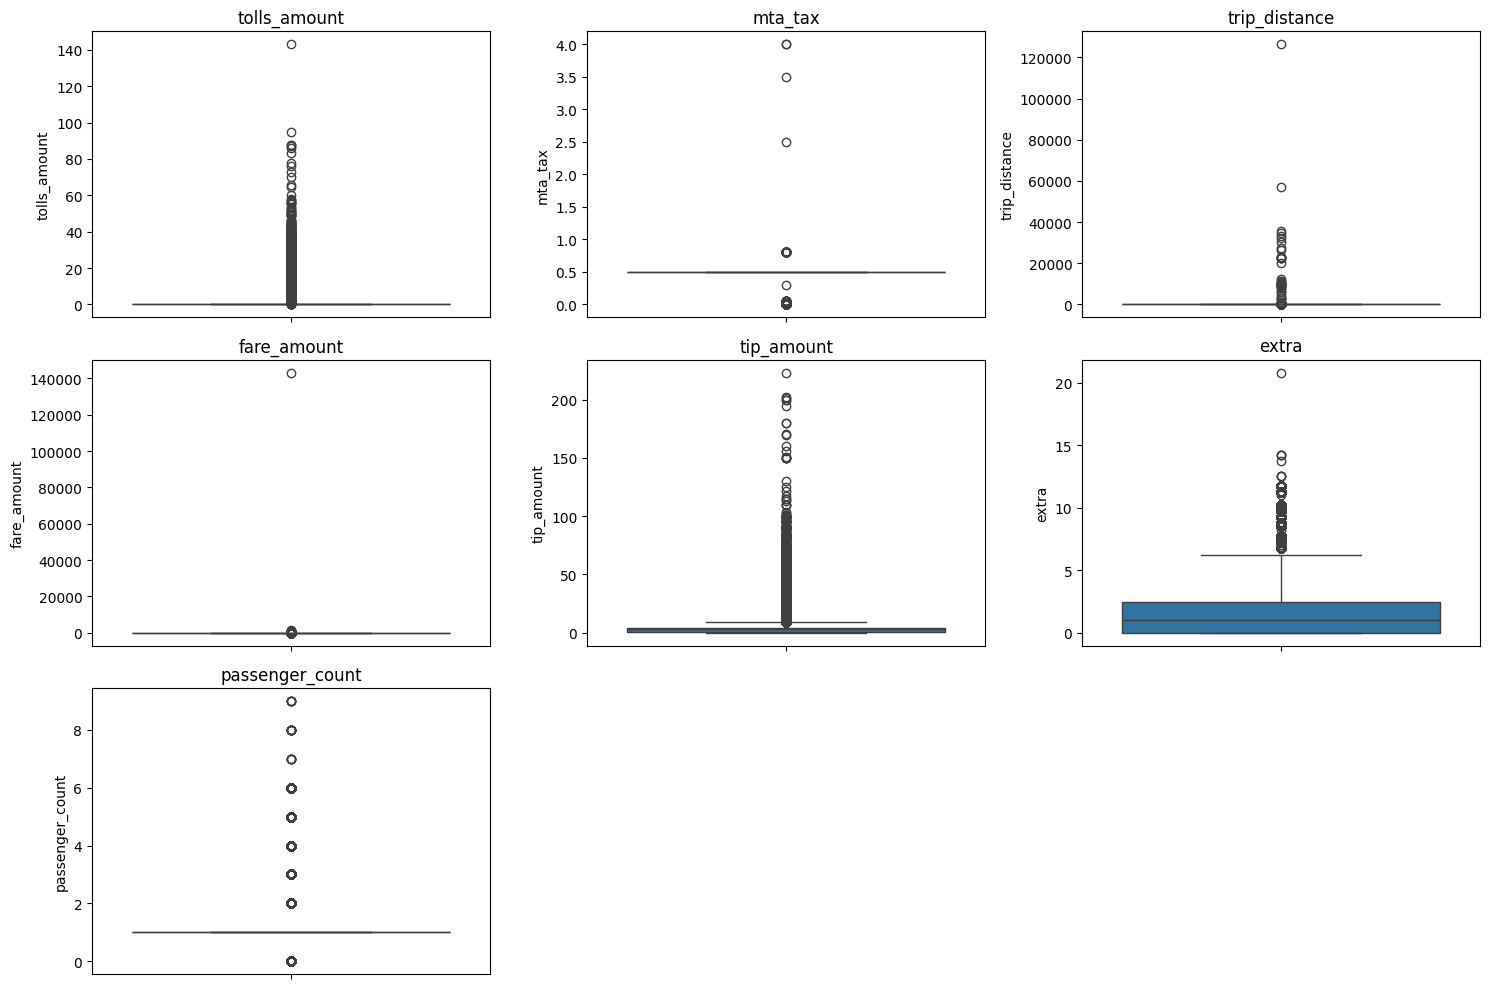

In [31]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

print(df.describe())

check_col = ['tolls_amount','mta_tax','trip_distance','fare_amount','tip_amount','extra','passenger_count']
plt.figure(figsize=(15,10))
for i, col in enumerate(check_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(y=df[col])
    plt.title(col)
    plt.tight_layout()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [32]:
# remove passenger_count > 6
df=df[df['passenger_count']<=6]

In [33]:
# Continue with outlier handling
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
df = df[~((df['trip_distance'] == 0) & (df['fare_amount'] == 0) & (df['PULocationID'] != df['DOLocationID']))]
df = df[df['trip_distance']<250]
df = df[df['payment_type'] != 0]

In [34]:
# Do any columns need standardising?
cols= ['trip_distance', 'fare_amount', 'total_amount', 'tip_amount', 'tolls_amount']
for col in cols:
    df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())


## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [35]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'combined_airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

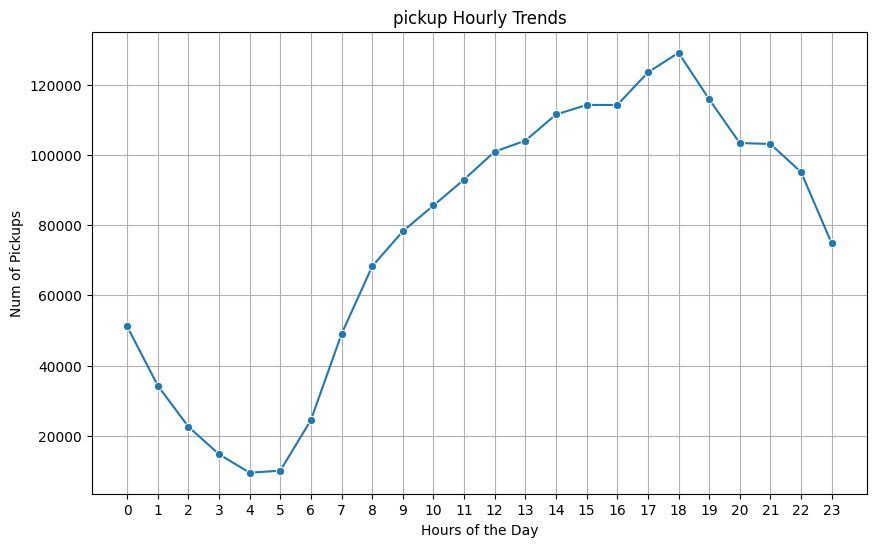

In [36]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
hrly_pickups = df.groupby("pickup_hour").size()

plt.figure(figsize=(10,6))
sns.lineplot(x=hrly_pickups.index, y=hrly_pickups.values, marker='o')
plt.xlabel('Hours of the Day')
plt.ylabel('Num of Pickups')
plt.title('pickup Hourly Trends')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

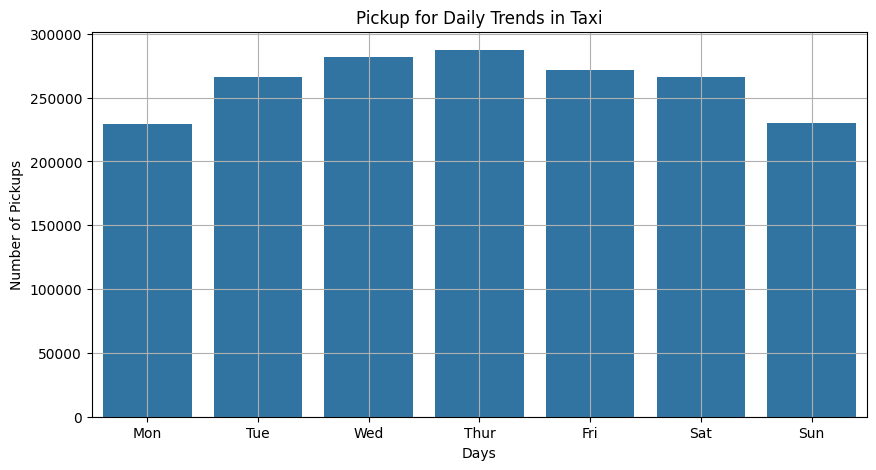

In [37]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.day_of_week

days = ["Mon", "Tue", "Wed", "Thur", "Fri", "Sat", "Sun"]
daily_pickups = df.groupby('pickup_day').size()
plt.figure(figsize=(10, 5))
sns.barplot(x=days, y=daily_pickups.values)
plt.xlabel('Days')
plt.ylabel('Number of Pickups')
plt.title('Pickup for Daily Trends in Taxi')
plt.grid(True)
plt.show()

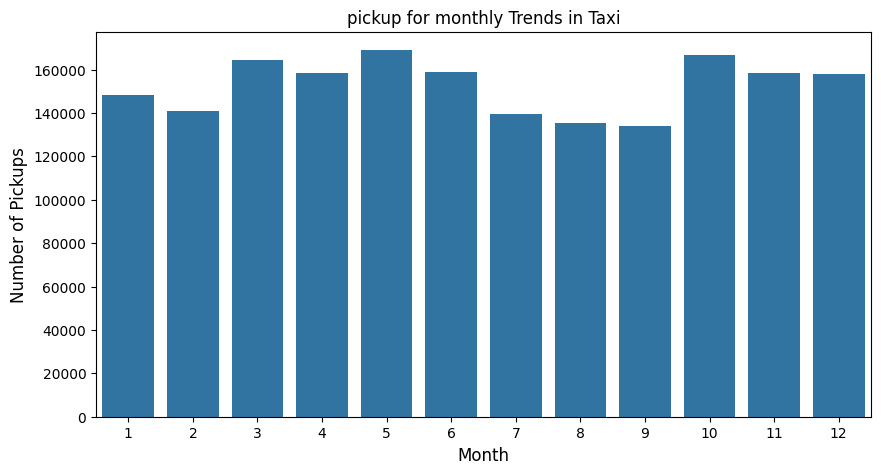

In [38]:
# Show the monthly trends in pickups
df['pickup_month'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.month

monthly_pickups = df['pickup_month'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values)
plt.xlabel("Month", fontsize=12)
plt.ylabel("Number of Pickups", fontsize=12)
plt.title("pickup for monthly Trends in Taxi")
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [39]:
# Analyse the above parameters
financial_columns = ["fare_amount", "tip_amount", "total_amount", "trip_distance"]

print("Zero counts in Financial Columns:")
zero_counts = (df[financial_columns] == 0).sum()
print(zero_counts)

print("\nNegative counts in Financial Columns:")
negative_counts = (df[financial_columns] < 0).sum()
print(negative_counts)


Zero counts in Financial Columns:
fare_amount         575
tip_amount       410234
total_amount        329
trip_distance     22928
dtype: int64

Negative counts in Financial Columns:
fare_amount      0
tip_amount       0
total_amount     0
trip_distance    0
dtype: int64


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [40]:
# Create a df with non zero entries for the selected parameters.
filtered_df = df.copy()
filtered_df = filtered_df[
    (filtered_df['fare_amount'] != 0) &
    (filtered_df['tip_amount'] != 0) &
    (filtered_df['total_amount'] != 0) &
    (filtered_df['trip_distance'] != 0)
]
print(f"Original: {df.shape}")
print(f"Filtered: {filtered_df.shape}")

Original: (1831391, 21)
Filtered: (1412905, 21)


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

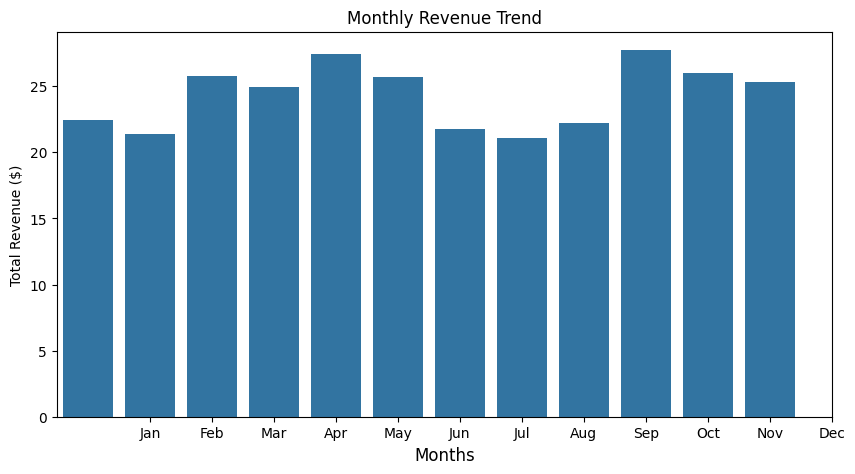

In [41]:
# Group data by month and analyse monthly revenue
# Calculate monthly revenue
filtered_df['pickup_month'] = pd.to_datetime(filtered_df['tpep_pickup_datetime']).dt.month
monthly_revenue = filtered_df.groupby('pickup_month')['total_amount'].sum()

plt.figure(figsize=(10, 5))
sns.barplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.xlabel("Months", fontsize=12)
plt.ylabel("Total Revenue ($)")
plt.title("Monthly Revenue Trend")
plt.xticks(ticks=range(1, 13), labels=[
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

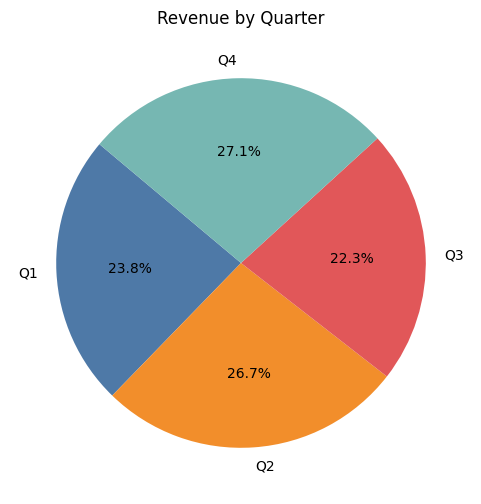

In [42]:
# Calculate proportion of each quarter

filtered_df['quarter'] = pd.to_datetime(filtered_df['tpep_pickup_datetime']).dt.quarter
quarterly_revenue = filtered_df.groupby('quarter')['total_amount'].sum()
labels = ["Q1", "Q2", "Q3", "Q4"]
plt.figure(figsize=(6, 6))
plt.pie(quarterly_revenue, labels=labels, autopct='%1.1f%%',colors=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2'],startangle=140)
plt.title("Revenue by Quarter")
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

Correlation: 0.95


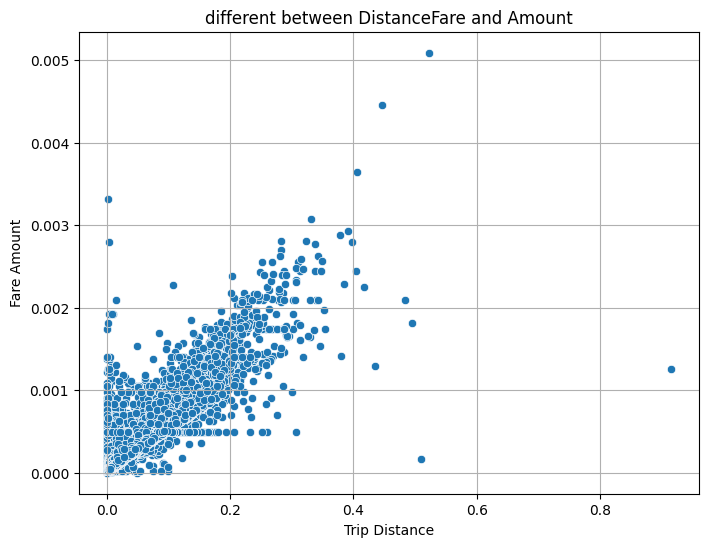

In [43]:
# Show how trip fare is affected by distance

filtered_df = filtered_df[filtered_df['trip_distance'] > 0]
print(f"Correlation: {filtered_df['trip_distance'].corr(filtered_df['fare_amount']):.2f}")

plt.figure(figsize=(8, 6))
sns.scatterplot(x="trip_distance", y="fare_amount", data=filtered_df)
plt.xlabel("Trip Distance")
plt.ylabel("Fare Amount")
plt.title("different between DistanceFare and Amount")
plt.grid(True)
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation: 0.33


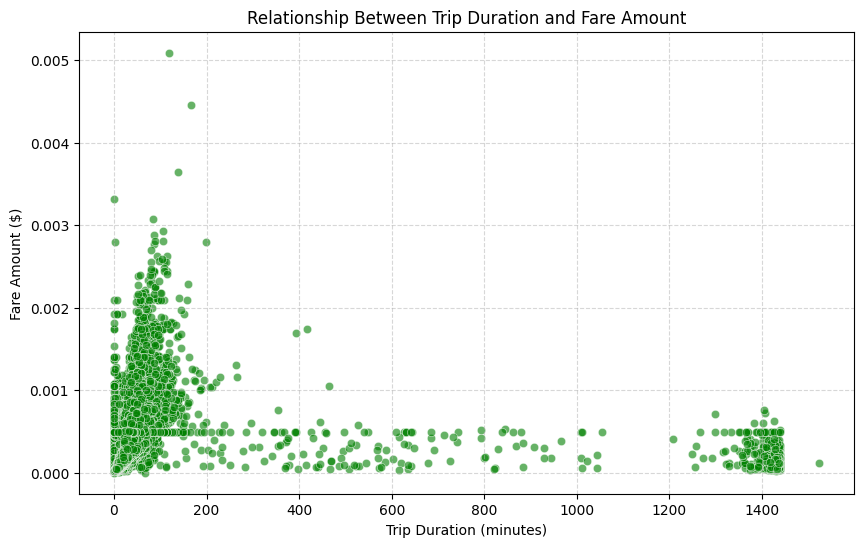

In [44]:
# Convert timestamps and compute trip duration in minutes
filtered_df['tpep_pickup_datetime'] = pd.to_datetime(filtered_df['tpep_pickup_datetime'])
filtered_df['tpep_dropoff_datetime'] = pd.to_datetime(filtered_df['tpep_dropoff_datetime'])
filtered_df['trip_duration'] = (filtered_df['tpep_dropoff_datetime'] - filtered_df['tpep_pickup_datetime']).dt.total_seconds() / 60

filtered_df = filtered_df[filtered_df['trip_duration'] > 0]
print(f"Correlation: {filtered_df['trip_duration'].corr(filtered_df['fare_amount']):.2f}")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_duration', y='fare_amount', data=filtered_df, color='green', alpha=0.6)
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Fare Amount ($)")
plt.title("Relationship Between Trip Duration and Fare Amount")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

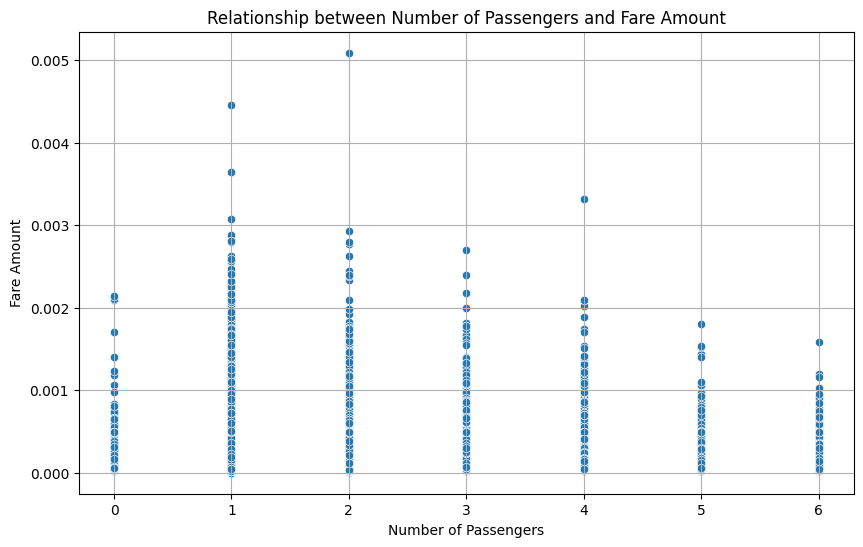

Correlation between Number of Passengers and Fare Amount: 0.04


In [45]:
# Show relationship between fare and number of passengers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='passenger_count', y='fare_amount', data=filtered_df)
plt.title('Relationship between Number of Passengers and Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.grid(True)
plt.show()
correlation_value_passenger_fare = filtered_df['passenger_count'].corr(filtered_df['fare_amount'])
print(f'Correlation between Number of Passengers and Fare Amount: {correlation_value_passenger_fare:.2f}')

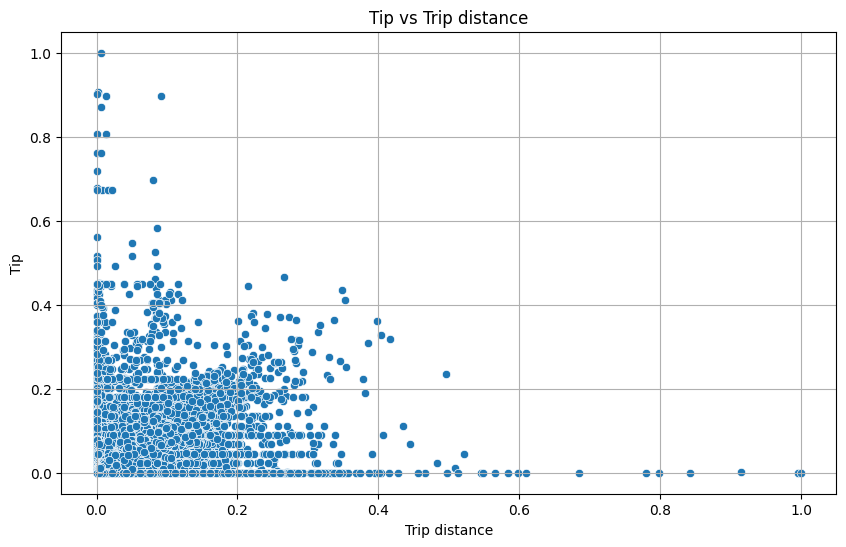

Correlation between trip distance and tip given: 0.57


In [46]:
# Show relationship between tip and trip distance
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='trip_distance', y='tip_amount')
plt.title('Tip vs Trip distance')
plt.xlabel('Trip distance')
plt.ylabel('Tip')
plt.grid(True)
plt.show()
corr_value = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation between trip distance and tip given: {corr_value:.2f}")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

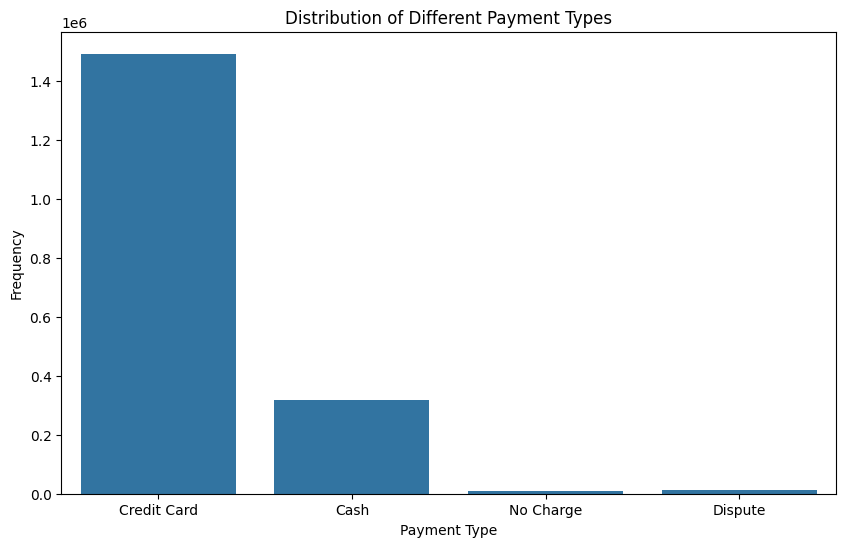

In [47]:
# Analyse the distribution of different payment types (payment_type).
payment_types ={
    1: 'Credit Card',
    2: 'Cash',
    3: 'No Charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided Trip'}
payment_type_counts = df['payment_type'].value_counts()
payment_type_counts = payment_type_counts.reindex(payment_types.keys(), fill_value=0)
payment_labels = [payment_types.get(code, 'Unknown') for code in payment_type_counts.index]
payment_df = pd.DataFrame({
    'Type': payment_labels,
    'Count': payment_type_counts.values
})
payment_df = payment_df[payment_df['Count'] > 0].reset_index(drop=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=payment_df, x='Type', y='Count')
plt.title('Distribution of Different Payment Types')
plt.xlabel('Payment Type')
plt.ylabel('Frequency')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [48]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [49]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r"/content/drive/MyDrive/ass/EDA DATASHEET NYC Taxi/taxi_zones/taxi_zones.shp")
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

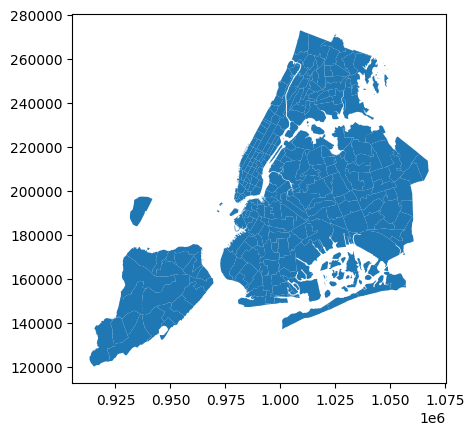

In [50]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [51]:
# Merge zones and trip records using locationID and PULocationID
Taxi_data_df = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
Taxi_data_df.head()


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,pickup_hour,pickup_day,pickup_month,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,2,2023-01-01 00:07:18,2023-01-01 00:23:15,1,0.037782,1,138,256,2,0.000226,...,0,6,1,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031..."
1,2,2023-01-01 00:16:41,2023-01-01 00:21:46,2,0.006053,1,161,237,1,0.000055,...,0,6,1,161.0,0.035804,0.000072,Midtown Center,161.0,Manhattan,"POLYGON ((991081.026 214453.698, 990952.644 21..."
2,2,2023-01-01 00:14:03,2023-01-01 00:24:36,3,0.007029,1,237,141,2,0.000080,...,0,6,1,237.0,0.042213,0.000096,Upper East Side South,237.0,Manhattan,"POLYGON ((993633.442 216961.016, 993507.232 21..."
3,2,2023-01-01 00:24:30,2023-01-01 00:29:55,1,0.002636,1,143,142,2,0.000045,...,0,6,1,143.0,0.054180,0.000151,Lincoln Square West,143.0,Manhattan,"POLYGON ((989338.1 223572.253, 989368.225 2235..."
4,1,2023-01-01 00:42:56,2023-01-01 01:16:33,2,0.034658,1,246,37,1,0.000241,...,0,6,1,246.0,0.069467,0.000281,West Chelsea/Hudson Yards,246.0,Manhattan,"POLYGON ((983031.177 217138.506, 983640.32 216..."


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [52]:
# Group data by location and calculate the number of trips
trip_per_loc = df.groupby('PULocationID').size().reset_index(name='numoftrips')
trip_per_loc.head()


,PULocationID,numoftrips
0,1,214
1,2,2
2,3,40
3,4,1861
4,5,13


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [53]:
# Merge trip counts back to the zones GeoDataFrame

zones_trips = pd.merge(zones, trip_per_loc, left_on='LocationID', right_on='PULocationID', how='left')
zones_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,numoftrips
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,214.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2.0,2.0
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,40.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,1861.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,13.0


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

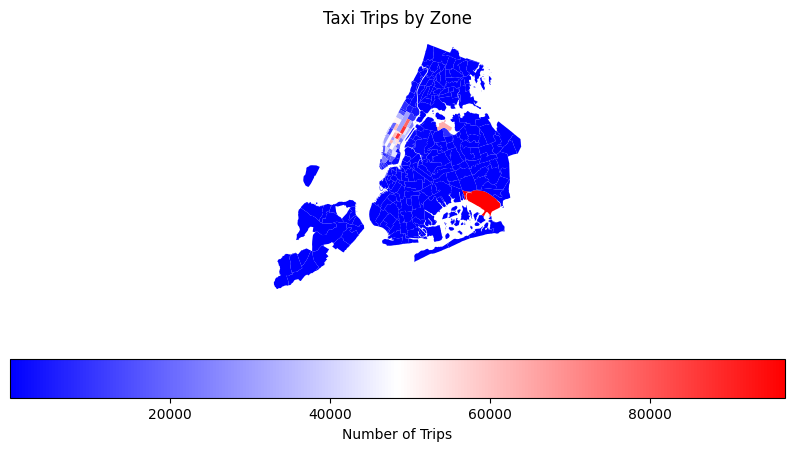

In [54]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
zones_trips.plot(
    column='numoftrips',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips",
        'orientation': "horizontal"
    },
    cmap='bwr'
)
ax.set_title("Taxi Trips by Zone")
plt.axis('off')
plt.show()

In [55]:
# can you try displaying the zones DF sorted by the number of trips?

zones_sorted = zones_trips.sort_values(by="numoftrips", ascending=False)
zones_sorted[["LocationID", "borough", "zone", "numoftrips"]].head(10)

,LocationID,borough,zone,numoftrips
131,132,Queens,JFK Airport,96827.0
236,237,Manhattan,Upper East Side South,86905.0
160,161,Manhattan,Midtown Center,85948.0
235,236,Manhattan,Upper East Side North,77517.0
161,162,Manhattan,Midtown East,65634.0
137,138,Queens,LaGuardia Airport,64177.0
185,186,Manhattan,Penn Station/Madison Sq West,63471.0
229,230,Manhattan,Times Sq/Theatre District,61315.0
141,142,Manhattan,Lincoln Square East,60887.0
169,170,Manhattan,Murray Hill,54493.0


Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [56]:
# Find routes which have the slowest speeds at different times of the day
# Convert pickup and dropoff time columns to datetime objects
Taxi_data_df['tpep_pickup_datetime'] = pd.to_datetime(Taxi_data_df['tpep_pickup_datetime'])
Taxi_data_df['tpep_dropoff_datetime'] = pd.to_datetime(Taxi_data_df['tpep_dropoff_datetime'])
Taxi_data_df['trip_duration_hours'] = (Taxi_data_df['tpep_dropoff_datetime'] -
                                             Taxi_data_df['tpep_pickup_datetime']).dt.total_seconds() / 3600
df_filtered_clean = Taxi_data_df[(Taxi_data_df["trip_duration_hours"] > 0) & (Taxi_data_df["trip_distance"] > 0)]

route_speed_clean = df_filtered_clean.groupby(["PULocationID", "DOLocationID", "pickup_hour"]).agg(
    avg_duration=("trip_duration_hours", "mean"),  # Average trip duration per route-hour
    total_distance=("trip_distance", "mean")  # Total distance per route-hour
).reset_index()

route_speed_clean["avg_speed"] = route_speed_clean["total_distance"] / (route_speed_clean["avg_duration"] + 1e-5)

slowest_routes_clean = route_speed_clean.sort_values(by="avg_speed", ascending=True).head(10)
slowest_routes_clean

,PULocationID,DOLocationID,pickup_hour,avg_duration,total_distance,avg_speed
102294,232,65,13,92.040556,0.002392,0.000026
114929,243,264,17,23.159167,0.000879,0.000038
61252,142,142,5,23.559167,0.002734,0.000116
120428,258,258,1,0.762500,0.000098,0.000128
33393,100,7,8,5.573889,0.001074,0.000193
6451,40,65,21,23.907222,0.005467,0.000229
39490,113,235,22,5.820556,0.001367,0.000235
89226,194,194,16,0.204444,0.000049,0.000239
95261,226,145,18,30.179352,0.007631,0.000253
9705,45,45,10,0.840556,0.000244,0.000290


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

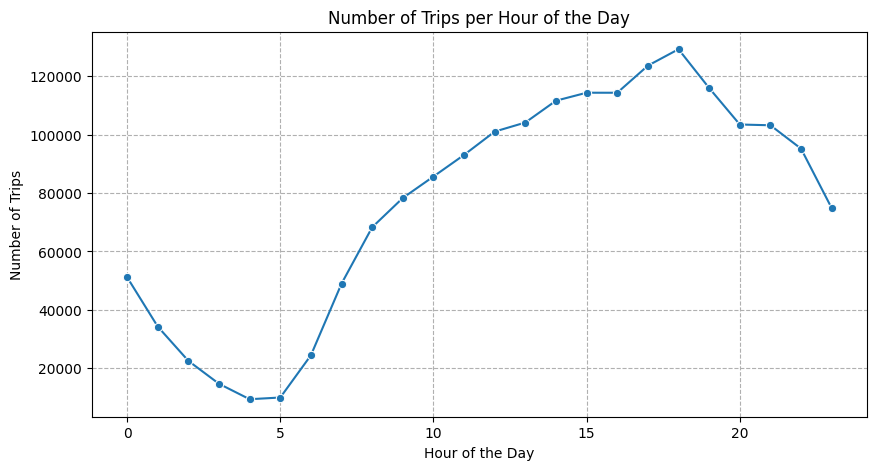

(np.int32(18), 129195)

In [57]:
# Calculate the number of trips per hour
trips_per_hour = Taxi_data_df.groupby('pickup_hour').size()

busiest_hour = trips_per_hour.idxmax()
busiest_hour_trips = trips_per_hour.max()

plt.figure(figsize=(10, 5))
sns.lineplot(x=trips_per_hour.index, y=trips_per_hour.values, marker="o")
plt.title('Number of Trips per Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Trips')
plt.grid(True, linestyle="--")
plt.show()

busiest_hour, busiest_hour_trips


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [58]:
# Scale up the number of trips
busiest_hours = trips_per_hour.nlargest(5)
print("Actual number of trips in the five busiest hours:")
busiest_hours

Actual number of trips in the five busiest hours:


,0
pickup_hour,
18,129195
17,123569
19,115922
15,114311
16,114302


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

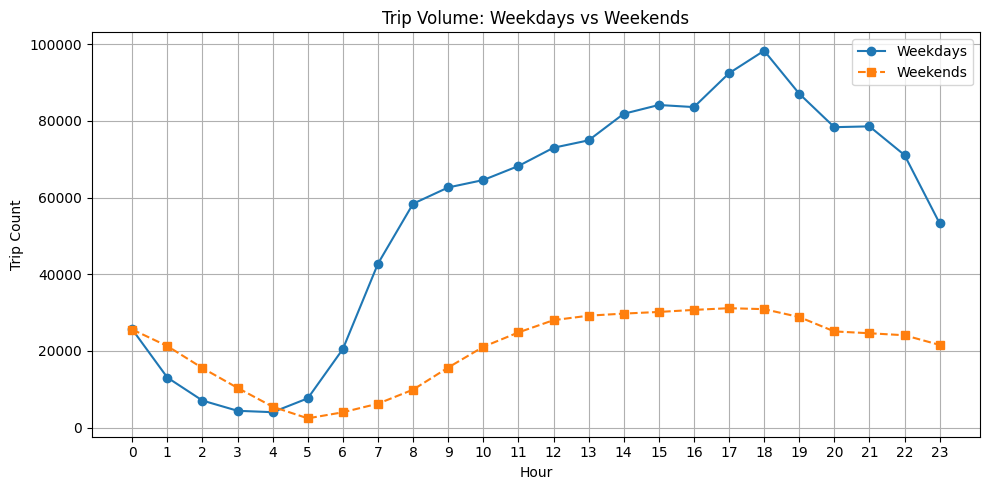

In [59]:
# Compare traffic trends for the week days and weekends

# Convert tpep_pickup_datetime to datetime objects in the original df
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])

df['day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek

weekday_data = df[df['day_of_week'] < 5]
weekend_data = df[df['day_of_week'] >= 5]

weekday_trips_by_hour = weekday_data['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()
weekend_trips_by_hour = weekend_data['tpep_pickup_datetime'].dt.hour.value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(weekday_trips_by_hour.index, weekday_trips_by_hour.values, label='Weekdays', marker='o', linestyle='-')
plt.plot(weekend_trips_by_hour.index, weekend_trips_by_hour.values, label='Weekends', marker='s', linestyle='--')
plt.title('Trip Volume: Weekdays vs Weekends')
plt.xlabel('Hour')
plt.ylabel('Trip Count')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

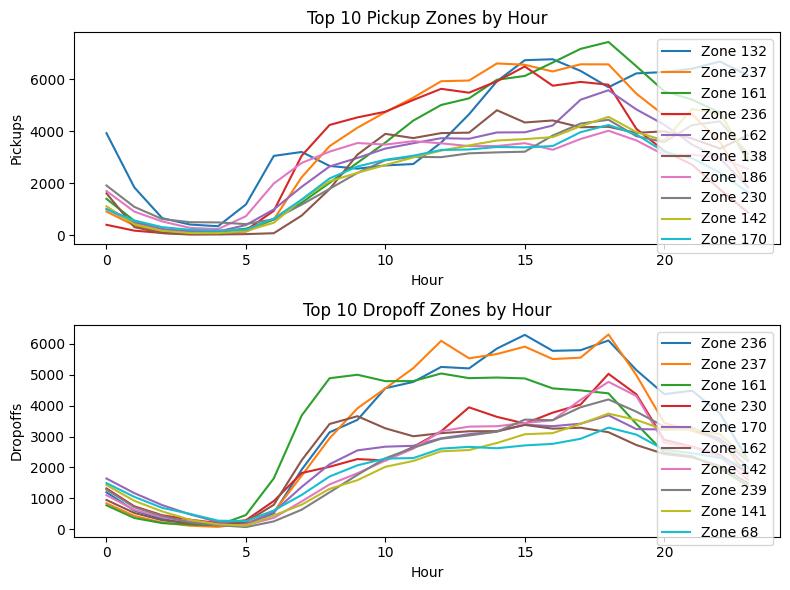

In [60]:
# Find top 10 pickup and dropoff zones

Taxi_data_df['pickup_hour'] = pd.to_datetime(Taxi_data_df['tpep_pickup_datetime']).dt.hour
Taxi_data_df['dropoff_hour'] = pd.to_datetime(Taxi_data_df['tpep_dropoff_datetime']).dt.hour

pickup_counts = Taxi_data_df.groupby(['pickup_hour', 'PULocationID']).size().reset_index(name='count')
dropoff_counts = Taxi_data_df.groupby(['dropoff_hour', 'DOLocationID']).size().reset_index(name='count')

top_pickups = pickup_counts.groupby('PULocationID')['count'].sum().nlargest(10).index
top_dropoffs = dropoff_counts.groupby('DOLocationID')['count'].sum().nlargest(10).index

pickup_data = pickup_counts[pickup_counts['PULocationID'].isin(top_pickups)]
dropoff_data = dropoff_counts[dropoff_counts['DOLocationID'].isin(top_dropoffs)]

fig, ax = plt.subplots(2, 1, figsize=(8, 6))

for zone in top_pickups:
    data = pickup_data[pickup_data['PULocationID'] == zone]
    ax[0].plot(data['pickup_hour'], data['count'], label=f'Zone {zone}')
ax[0].set_title('Top 10 Pickup Zones by Hour')
ax[0].set_xlabel('Hour')
ax[0].set_ylabel('Pickups')
ax[0].legend()

for zone in top_dropoffs:
    data = dropoff_data[dropoff_data['DOLocationID'] == zone]
    ax[1].plot(data['dropoff_hour'], data['count'], label=f'Zone {zone}')
ax[1].set_title('Top 10 Dropoff Zones by Hour')
ax[1].set_xlabel('Hour')
ax[1].set_ylabel('Dropoffs')
ax[1].legend()

plt.tight_layout()
plt.show()


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [61]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

pickup_total = pickup_counts.groupby('PULocationID')['count'].sum()
dropoff_total = dropoff_counts.groupby('DOLocationID')['count'].sum()

zone_data = pd.DataFrame({
    'pickups': pickup_total,
    'dropoffs': dropoff_total
}).fillna(0)

zone_data['dropoffs'] = zone_data['dropoffs'].replace(0, 1)

zone_data['ratio'] = zone_data['pickups'] / zone_data['dropoffs']

top_10_ratios = zone_data.sort_values('ratio', ascending=False).head(10)
bottom_10_ratios = zone_data.sort_values('ratio').head(10)

print("Top 10 Zones with Highest Pickup/Dropoff Ratios:")
print(top_10_ratios)

print("\nBottom 10 Zones with Lowest Pickup/Dropoff Ratios:")
print(bottom_10_ratios)

Top 10 Zones with Highest Pickup/Dropoff Ratios:
     pickups  dropoffs     ratio
70    8354.0    1004.0  8.320717
132  96827.0   20970.0  4.617406
138  64177.0   22249.0  2.884489
199      2.0       1.0  2.000000
186  63471.0   40117.0  1.582147
43   30752.0   22369.0  1.374760
114  24113.0   17540.0  1.374743
249  40406.0   30468.0  1.326178
162  65634.0   52250.0  1.256153
161  85948.0   71648.0  1.199587

Bottom 10 Zones with Lowest Pickup/Dropoff Ratios:
     pickups  dropoffs     ratio
30       0.0      18.0  0.000000
245      0.0      30.0  0.000000
176      0.0      12.0  0.000000
99       0.0       3.0  0.000000
27       1.0      39.0  0.025641
221      1.0      34.0  0.029412
257     29.0     758.0  0.038259
1      214.0    5319.0  0.040233
115      1.0      23.0  0.043478
198     52.0     990.0  0.052525


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [62]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

night_hours = df[(df['tpep_pickup_datetime'].dt.hour >= 23) | (df['tpep_pickup_datetime'].dt.hour < 5)]
pickup_zones = zones[['LocationID', 'zone']].rename(columns={'zone': 'pickup_zone'})
dropoff_zones = zones[['LocationID', 'zone']].rename(columns={'zone': 'dropoff_zone'})

night_hours = night_hours.merge(pickup_zones, left_on='PULocationID', right_on='LocationID', how='left')
night_hours = night_hours.merge(dropoff_zones, left_on='DOLocationID', right_on='LocationID', how='left', suffixes=('_pu', '_do'))
top10_pickup_zones = night_hours['pickup_zone'].value_counts().head(10)

top10_dropoff_zones = night_hours['dropoff_zone'].value_counts().head(10)
print("Top 10 Pickup Zones (11PM to 5AM):")
print(top10_pickup_zones)

print("\nTop 10 Dropoff Zones (11PM to 5AM):")
print(top10_dropoff_zones)


Top 10 Pickup Zones (11PM to 5AM):
pickup_zone
East Village                    15339
JFK Airport                     13399
West Village                    12352
Clinton East                     9797
Lower East Side                  9535
Greenwich Village South          8720
Times Sq/Theatre District        7776
Penn Station/Madison Sq West     6233
Midtown South                    5962
LaGuardia Airport                5947
Name: count, dtype: int64

Top 10 Dropoff Zones (11PM to 5AM):
dropoff_zone
East Village                 8239
Clinton East                 6641
Murray Hill                  6085
Gramercy                     5627
East Chelsea                 5551
Lenox Hill West              5122
West Village                 4896
Yorkville West               4878
Lower East Side              4321
Times Sq/Theatre District    4297
Name: count, dtype: int64


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [63]:
# Filter for night hours (11 PM to 5 AM)
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

night_data = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
day_data = df[(df['pickup_hour'] >= 6) & (df['pickup_hour'] <= 22)]

night_revenue = night_data['total_amount'].sum()
day_revenue = day_data['total_amount'].sum()
total_revenue = df['total_amount'].sum()

night_percent = (night_revenue / total_revenue) * 100
day_percent = (day_revenue / total_revenue) * 100

print(f"Revenue Share Night time (11 PM - 5 AM): {night_percent:.2f}%")
print(f"Revenue Share Daytime(6 AM - 10 PM): {day_percent:.2f}%")


Revenue Share Night time (11 PM - 5 AM): 12.06%
Revenue Share Daytime(6 AM - 10 PM): 87.94%


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [64]:
# Analyse the fare per mile per passenger for different passenger counts

data_merged = df[(df['trip_distance'] > 0) & (df['passenger_count'] > 0)].copy()
data_merged['fare_per_passenger_mile'] = data_merged['total_amount'] / (data_merged['trip_distance'] * data_merged['passenger_count'])
avg_fare_per_passenger = data_merged.groupby('passenger_count', as_index=False)['fare_per_passenger_mile'].mean()
avg_fare_per_passenger


,passenger_count,fare_per_passenger_mile
0,1,0.024175
1,2,0.013309
2,3,0.008308
3,4,0.008498
4,5,0.003936
5,6,0.003173


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [65]:
# Compare the average fare per mile for different days and hours

df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['day_of_week'] = df['tpep_pickup_datetime'].dt.day_name()
df['hour'] = df['tpep_pickup_datetime'].dt.hour

df['fare_per_mile'] = df.apply(
    lambda r: r['fare_amount'] / r['trip_distance'] if r['trip_distance'] else 0, axis=1)

avg_fare_by_day = df.groupby('day_of_week')['fare_per_mile'].mean().round(2).reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

print("Average Fare per Mile by Day of Week:")
print(avg_fare_by_day)
avg_fare_by_hour = df.groupby('hour')['fare_per_mile'].mean().round(2)

print("\nAverage Fare per Mile by Hour of Day:")
print(avg_fare_by_hour)

Average Fare per Mile by Day of Week:
day_of_week
Monday       0.02
Tuesday      0.02
Wednesday    0.02
Thursday     0.02
Friday       0.02
Saturday     0.02
Sunday       0.02
Name: fare_per_mile, dtype: float64

Average Fare per Mile by Hour of Day:
hour
0     0.01
1     0.02
2     0.01
3     0.02
4     0.02
5     0.02
6     0.02
7     0.01
8     0.01
9     0.01
10    0.02
11    0.02
12    0.02
13    0.02
14    0.02
15    0.02
16    0.02
17    0.02
18    0.02
19    0.02
20    0.01
21    0.01
22    0.01
23    0.02
Name: fare_per_mile, dtype: float64


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

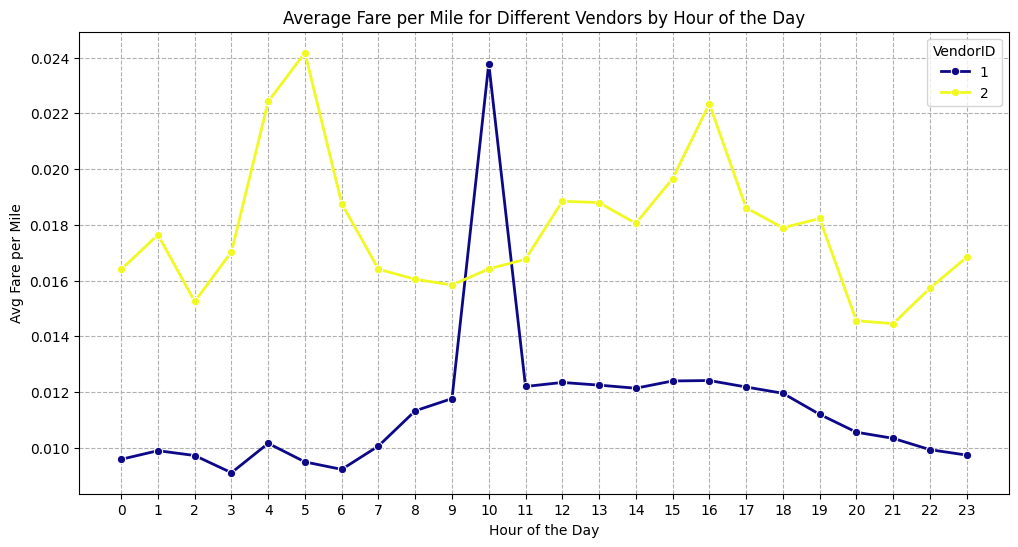

In [66]:
# Compare fare per mile for different vendors
Taxi_data_df['fare_per_mile'] = Taxi_data_df.apply(
    lambda r: r['fare_amount'] / r['trip_distance'] if r['trip_distance'] > 0 else 0, axis=1)

fare_by_vendor_hour = Taxi_data_df.groupby(["VendorID", "pickup_hour"])["fare_per_mile"].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(
    x="pickup_hour", y="fare_per_mile", hue="VendorID", data=fare_by_vendor_hour,
    marker="o", palette="plasma", linewidth=2, ci=95)
plt.xlabel("Hour of the Day")
plt.ylabel("Avg Fare per Mile")
plt.title("Average Fare per Mile for Different Vendors by Hour of the Day")
plt.xticks(range(0, 24))
plt.legend(title="VendorID")
plt.grid(True, linestyle="--")
plt.show()

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


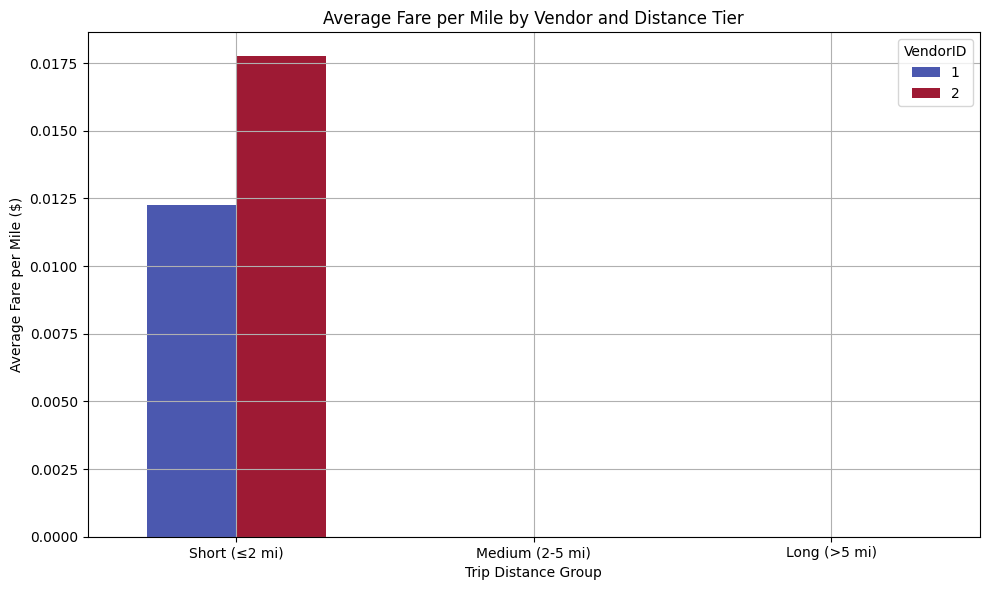

In [67]:
# Define distance categories
def classify_distance(miles):
    if miles <= 2:
        return "Short (≤2 mi)"
    elif miles <= 5:
        return "Medium (2-5 mi)"
    else:
        return "Long (>5 mi)"
taxi_data_merged = pd.merge(df, zones, left_on='PULocationID', right_on='LocationID', how='left')
taxi_data_merged = taxi_data_merged[taxi_data_merged['trip_distance'] > 0].copy()
taxi_data_merged['fare_per_mile'] = taxi_data_merged['fare_amount'] / taxi_data_merged['trip_distance']
taxi_data_merged['distance_group'] = taxi_data_merged['trip_distance'].apply(classify_distance)
category_order = ["Short (≤2 mi)", "Medium (2-5 mi)", "Long (>5 mi)"]
taxi_data_merged['distance_group'] = pd.Categorical(taxi_data_merged['distance_group'], categories=category_order, ordered=True)
vendor_fare_stats = (taxi_data_merged.groupby(['VendorID', 'distance_group'])['fare_per_mile'].mean().reset_index())
plt.figure(figsize=(10, 6))
sns.barplot(data=vendor_fare_stats, x='distance_group', y='fare_per_mile', hue='VendorID', palette='coolwarm', width=0.6, ci=None)
plt.xlabel("Trip Distance Group")
plt.ylabel("Average Fare per Mile ($)")
plt.title("Average Fare per Mile by Vendor and Distance Tier")
plt.grid(True)
plt.tight_layout()
plt.show()


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

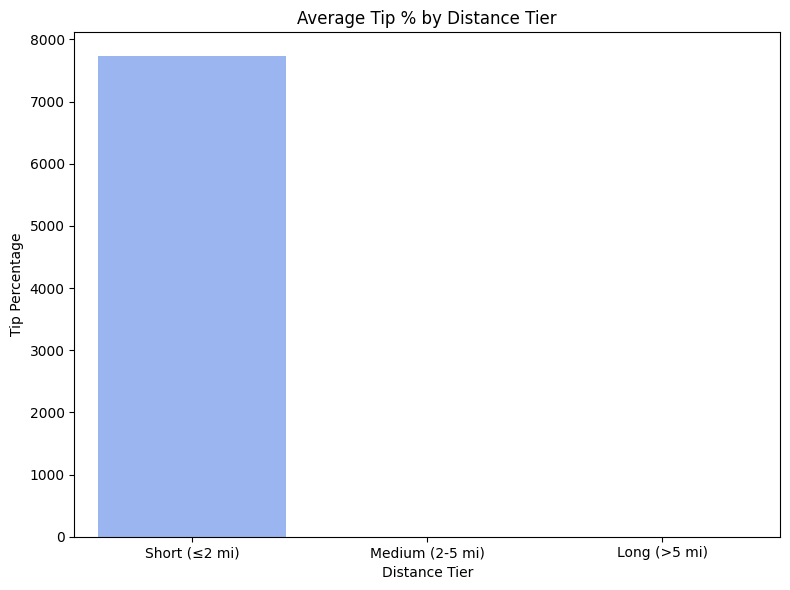

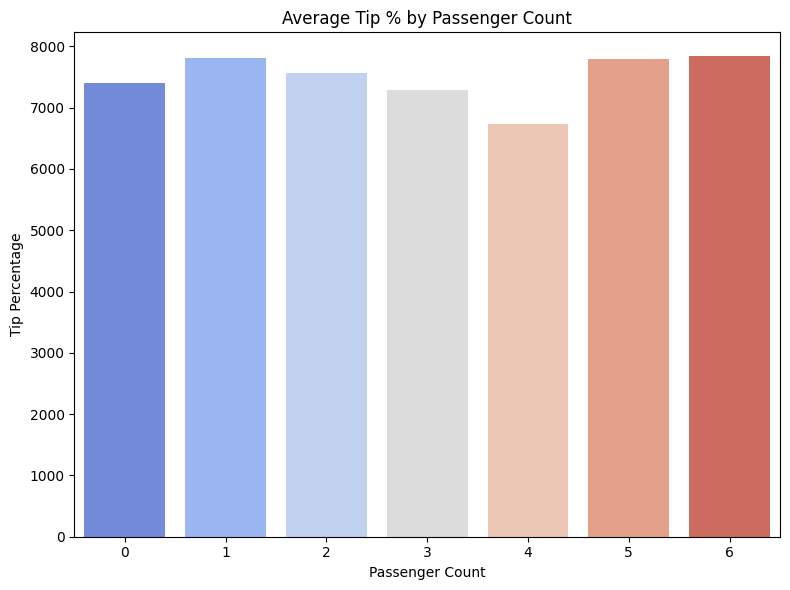

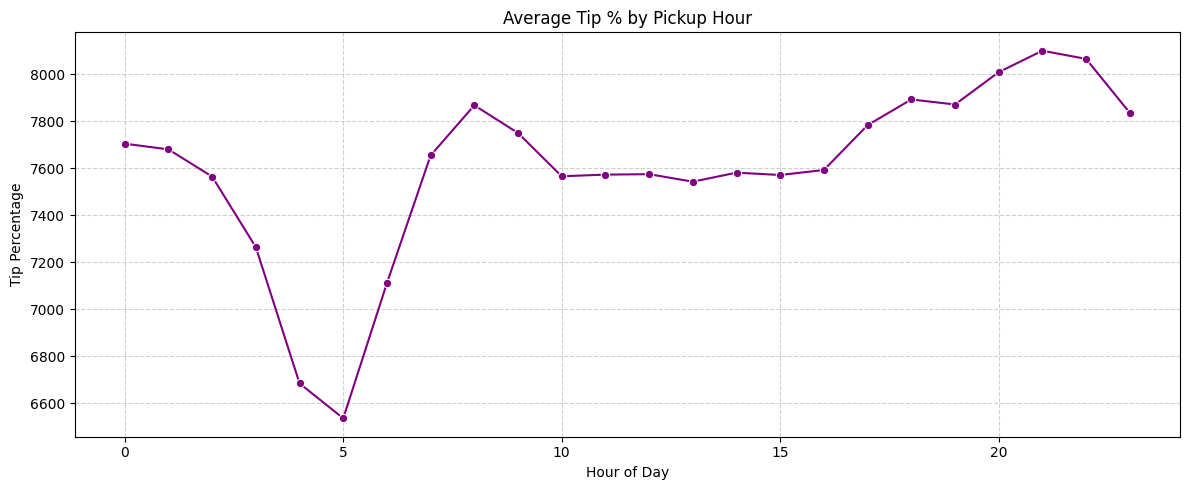

In [68]:

def classify_distance(miles):
    if miles <= 2:
        return "Short (≤2 mi)"
    elif miles <= 5:
        return "Medium (2-5 mi)"
    else:
        return "Long (>5 mi)"

if 'distance_group' not in taxi_data_merged.columns:
    taxi_data_merged['distance_group'] = taxi_data_merged['trip_distance'].apply(classify_distance)
    category_order = ["Short (≤2 mi)", "Medium (2-5 mi)", "Long (>5 mi)"]
    taxi_data_merged['distance_group'] = pd.Categorical(taxi_data_merged['distance_group'], categories=category_order, ordered=True)

if 'pickup_hour' not in taxi_data_merged.columns:
    taxi_data_merged['pickup_hour'] = pd.to_datetime(taxi_data_merged['tpep_pickup_datetime']).dt.hour


taxi_data_merged['tip_percentage'] = (taxi_data_merged['tip_amount'] / (taxi_data_merged['total_amount'] + 1e-9)) * 100

# Average tip % by distance tier (using 'distance_group')
tip_distance = taxi_data_merged.groupby('distance_group')['tip_percentage'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=tip_distance, x='distance_group', y='tip_percentage', palette='coolwarm')
plt.title('Average Tip % by Distance Tier')
plt.xlabel('Distance Tier')
plt.ylabel('Tip Percentage')
plt.tight_layout()
plt.show()

# Average tip % by passenger count
tip_passenger = taxi_data_merged.groupby('passenger_count')['tip_percentage'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=tip_passenger, x='passenger_count', y='tip_percentage', palette='coolwarm')
plt.title('Average Tip % by Passenger Count')
plt.xlabel('Passenger Count')
plt.ylabel('Tip Percentage')
plt.tight_layout()
plt.show()

# Average tip % by pickup hour
tip_hour = taxi_data_merged.groupby('pickup_hour')['tip_percentage'].mean().reset_index()
plt.figure(figsize=(12, 5))
sns.lineplot(data=tip_hour, x='pickup_hour', y='tip_percentage', marker='o', color='purple')
plt.title('Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip Percentage')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

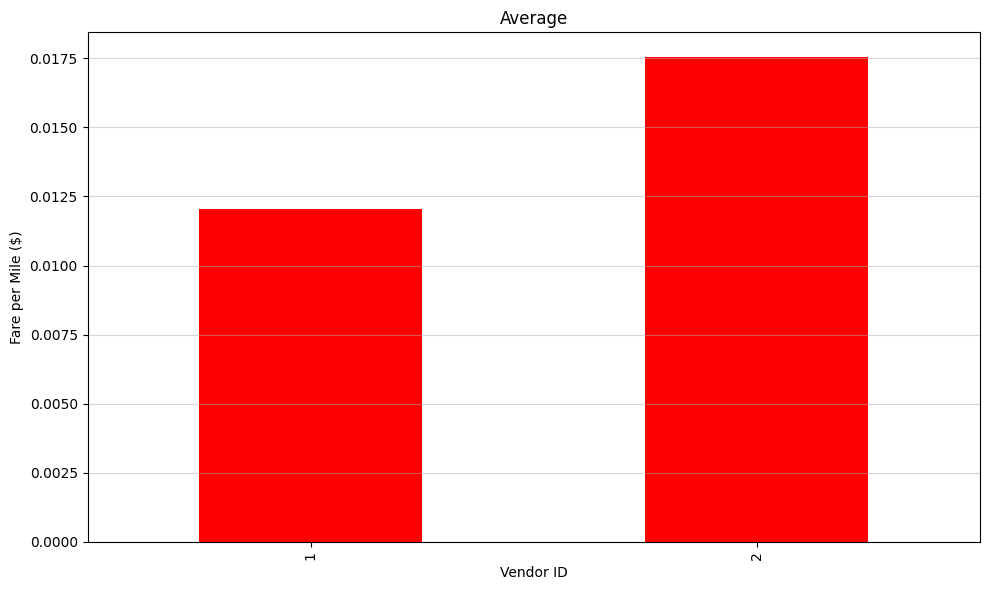

In [69]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

vendor_fare = df.groupby('VendorID')['fare_per_mile'].mean().sort_values()

vendor_fare.plot(kind='bar', color='red', figsize=(10,6 ))
plt.title('Average')
plt.xlabel('Vendor ID')
plt.ylabel('Fare per Mile ($)')
plt.grid(axis='y', linestyle='-', alpha=0.5)
plt.tight_layout()
plt.show()


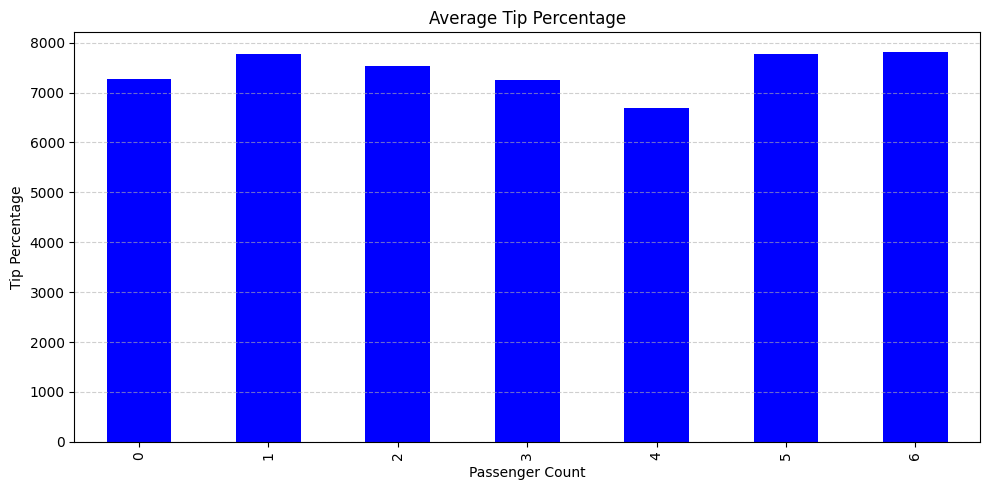

In [70]:
# See how passenger count varies across hours and days
df['tip_percentage'] = (df['tip_amount'] / (df['total_amount'] + 1e-9)) * 100

tip_by_passenger = df.groupby('passenger_count')['tip_percentage'].mean()
tip_by_passenger.plot(kind='bar', figsize=(10, 5), color='Blue')
plt.title('Average Tip Percentage')
plt.ylabel('Tip Percentage')
plt.xlabel('Passenger Count')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

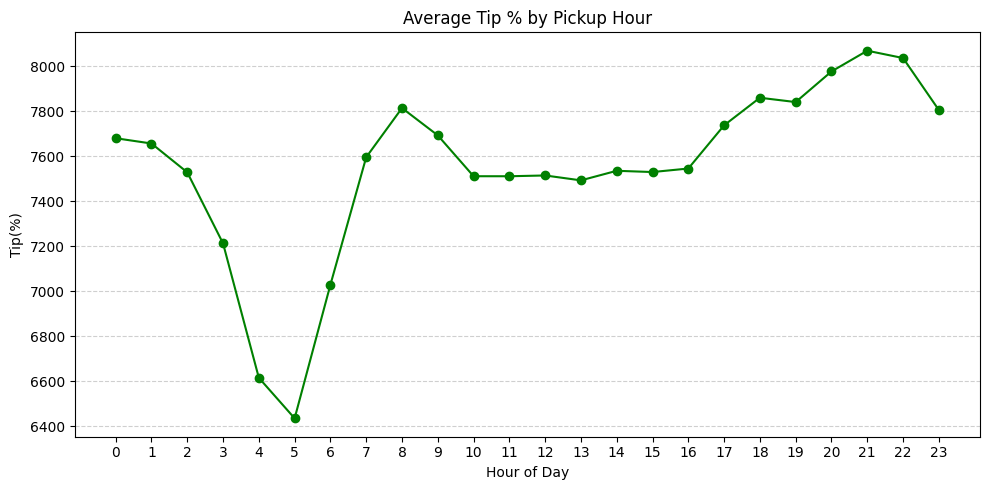

In [71]:
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
tip_by_hour = df.groupby('pickup_hour')['tip_percentage'].mean()
tip_by_hour.plot(kind='line', marker='o', figsize=(10, 5), color='green')
plt.title('Average Tip % by Pickup Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Tip(%)')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

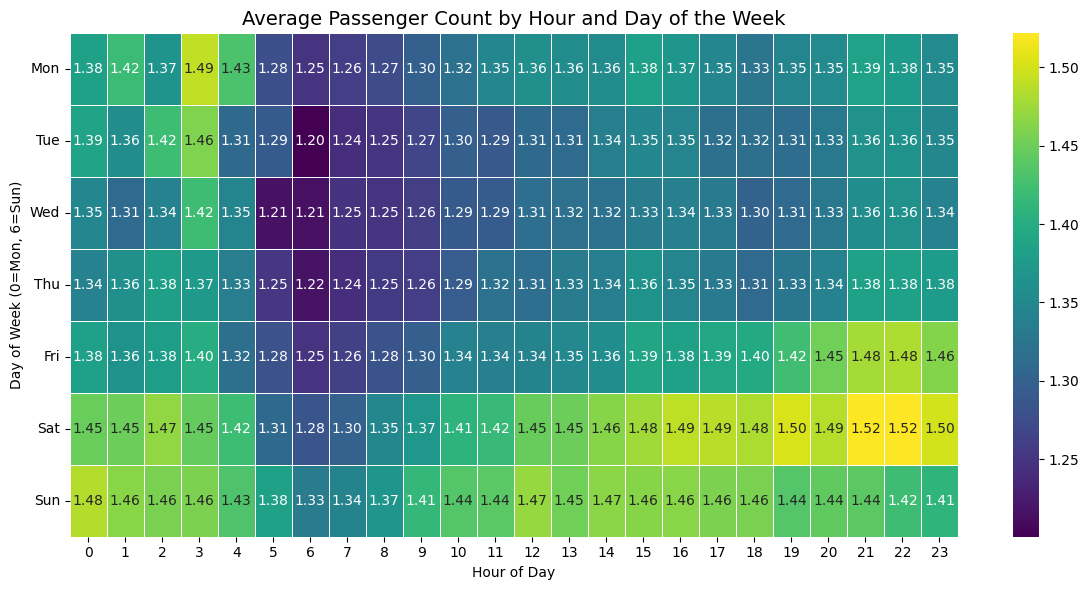

In [72]:
# How often is each surcharge applied?
# See how passenger count varies across hours and days
df['passenger_count'] = pd.to_numeric(df['passenger_count'], errors='coerce')
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek
passenger_variation = df.groupby(['pickup_dayofweek', 'pickup_hour'])['passenger_count'].mean().unstack(fill_value=0)

# Convert the passenger_variation DataFrame to a numeric type, coercing errors
passenger_variation = passenger_variation.apply(pd.to_numeric, errors='coerce')
passenger_variation = passenger_variation.astype(float)
plt.figure(figsize=(12, 6))
sns.heatmap(passenger_variation, cmap='viridis', linewidths=0.5, annot=True, fmt=".2f")
plt.title('Average Passenger Count by Hour and Day of the Week', fontsize=14)
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Mon, 6=Sun)')
plt.yticks(ticks=np.arange(7) + 0.5, labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'], rotation=0)
plt.tight_layout()
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

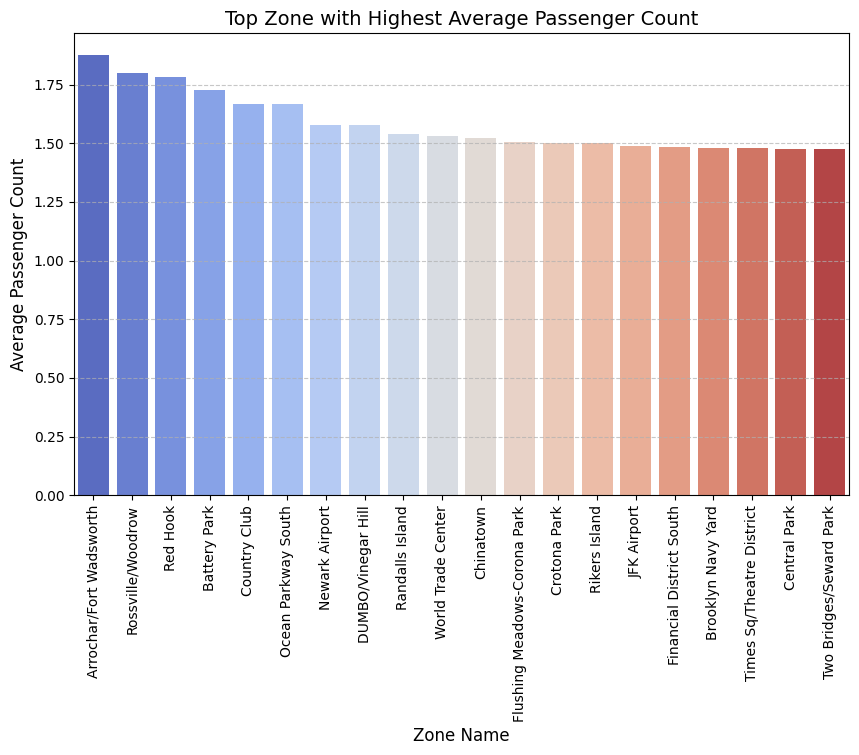

In [73]:
# How does passenger count vary across zones
avg_passenger_by_zone = Taxi_data_df.groupby('zone')['passenger_count'].mean()
avg_passenger_by_zone_sorted = avg_passenger_by_zone.sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x="zone", y="passenger_count", data=avg_passenger_by_zone_sorted.head(20), palette="coolwarm")
plt.title("Top Zone with Highest Average Passenger Count", fontsize=14)
plt.xlabel("Zone Name", fontsize=12)
plt.ylabel("Average Passenger Count", fontsize=12)
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

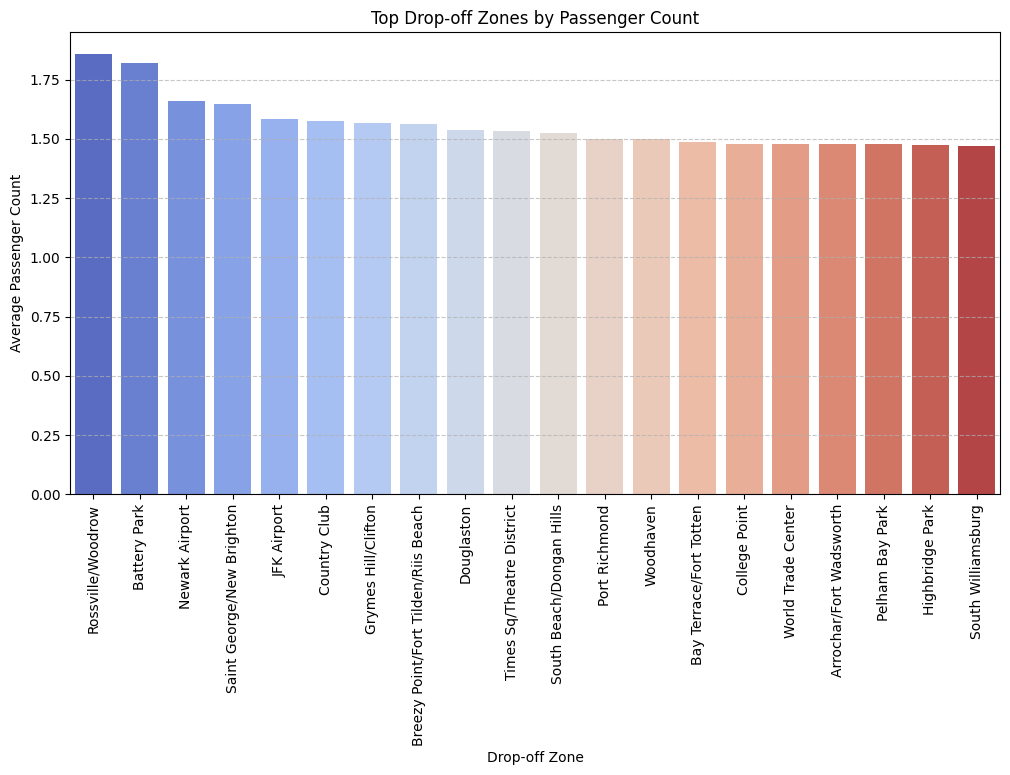

In [74]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
location_to_zone = Taxi_data_df[['LocationID', 'zone']].drop_duplicates() # Changed variable name here
Taxi_data_df = Taxi_data_df.merge(location_to_zone, left_on="DOLocationID", right_on="LocationID", how="left", suffixes=("", "_dropoff")) # Changed variable name here
avg_passenger_by_dropoff = Taxi_data_df.groupby("zone_dropoff")["passenger_count"].mean().reset_index() # Changed variable name here
avg_passenger_by_dropoff_sorted = avg_passenger_by_dropoff.sort_values(by="passenger_count", ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(x="zone_dropoff", y="passenger_count", data=avg_passenger_by_dropoff_sorted.head(20), palette="coolwarm")
plt.xlabel("Drop-off Zone")
plt.ylabel("Average Passenger Count")
plt.title("Top Drop-off Zones by Passenger Count")
plt.xticks(rotation=90)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

Frequency of Surcharge Application (%):
extra                    61.942644
mta_tax                  99.066884
tip_amount               77.599868
tolls_amount              8.116399
improvement_surcharge    99.959757
congestion_surcharge     92.309561
combined_airport_fee      8.787583
dtype: float64


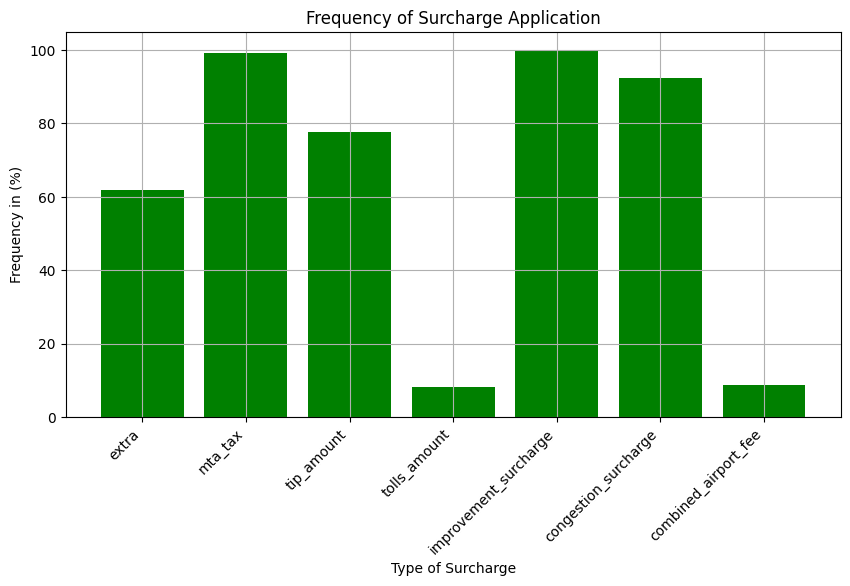

In [75]:
# How often is each surcharge applied?
surcharge_cols = ['extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'congestion_surcharge', 'combined_airport_fee']
surcharge_freq = df[surcharge_cols].astype(bool).sum() / len(df) * 100
print("Frequency of Surcharge Application (%):")
print(surcharge_freq)
plt.figure(figsize=(10, 5))
plt.bar(surcharge_freq.index, surcharge_freq.values, color='green')
plt.title('Frequency of Surcharge Application')
plt.xlabel('Type of Surcharge')
plt.ylabel('Frequency in (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

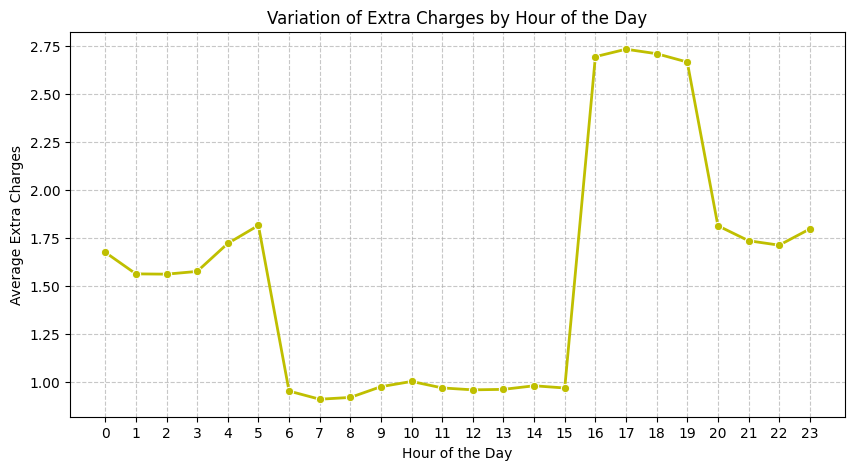

In [76]:
# Group by hour of the day and calculate average extra charges
extra_hour = Taxi_data_df.groupby("pickup_hour")["extra"].mean().reset_index()

# Plot
plt.figure(figsize=(10, 5))
sns.lineplot(data=extra_hour, x="pickup_hour", y="extra", marker="o", color="y", linewidth=2)
plt.xlabel("Hour of the Day")
plt.ylabel("Average Extra Charges")
plt.title("Variation of Extra Charges by Hour of the Day")
plt.xticks(range(0, 24))
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

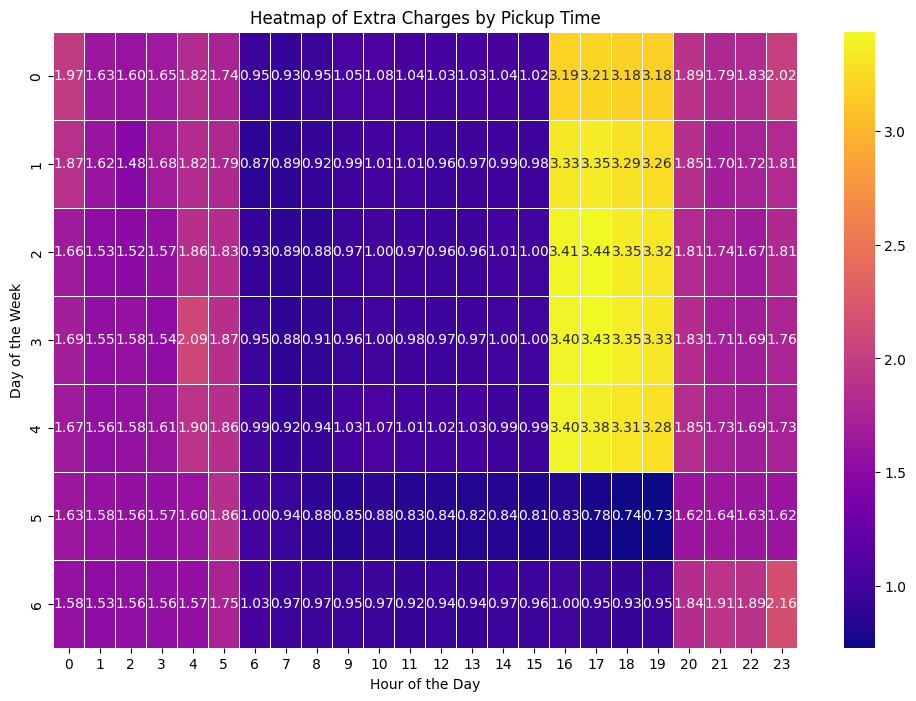

In [77]:
# Group by pickup day and hour to calculate average extra charges
heatmap_data = Taxi_data_df.groupby(["pickup_day", "pickup_hour"])["extra"].mean().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="plasma", annot=True, fmt=".2f", linewidths=0.5)
plt.xlabel("Hour of the Day")
plt.ylabel("Day of the Week")
plt.title("Heatmap of Extra Charges by Pickup Time")
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

Targeted Nighttime Coverage: Increase cab presence in nightlife-dense areas such as East Village, JFK Airport, and West Village between 11:00 PM and 2:00 AM to meet elevated late-night demand. Simultaneously, scale down deployments in consistently low-activity zones like the Bronx and Staten Island during these hours to improve fleet utilization.

Strategic Airport Operations: Airports such as JFK and LaGuardia generate sustained traffic and incur additional fare surcharges, making them ideal for continuous short-haul shuttle loops. Ensure dedicated cab availability throughout both day and night shifts to support airport access without service gaps.

Efficiency-Driven Zoning: Minimize dispatch frequency to areas characterized by a high volume of drop-offs but consistently low pickup activity—especially purely residential neighborhoods—unless data forecasts a strong likelihood of return-trip demand.

Real-Time Resource Reallocation: Integrate live traffic and passenger flow analytics to proactively shift idle vehicles from oversupplied locations to emerging high-demand areas. Hourly trend tracking should drive these redistributions to maintain service balance.

Smart Trip Pairing: In regions where single-passenger rides are common but request frequency remains high, implement app-based features that support ride-pooling or sequential trip dispatching. This approach maximizes vehicle efficiency and reduces passenger wait times.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1. Time-Aware Deployment:
Adjust fleet availability to mirror temporal demand cycles—boost coverage during peak commute hours (morning and evening), increase presence in nightlife zones during late hours, and scale back during midday lulls. Incorporate seasonal shifts by analyzing monthly trends to proactively manage surges or slowdowns.

2. Day-Specific Focus:
Concentrate services around commercial and financial districts on weekdays to cater to office-goers. On weekends, redirect resources toward residential neighborhoods, parks, and entertainment venues. Stay responsive to demand spikes during public holidays, festivals, and major city events.

3. Zone-Level Prioritization:
Enhance coverage in high-frequency pickup zones by analyzing historical demand data. Use drop-off trends to detect and correct geographic imbalances. Expand visibility in areas that maintain strong late-night activity to meet under-addressed demand.

4. Data-Driven Deployment:
Leverage live traffic feeds and real-time booking activity to inform tactical vehicle placements. Augment this with predictive models to forecast high-demand windows, enabling preemptive positioning. Integrate with ride-hailing platforms to align cab availability with customer needs dynamically.

5. Coordinated Operations:
Foster ongoing communication between dispatch centers and drivers to provide live updates on demand hotspots and suggested routes. Collaborate with city transport departments to address urban mobility challenges and align with broader transportation goals.

6. Technology Integration:
Utilize GPS tracking, demand heatmaps, and interactive analytics dashboards to gain visibility into rider behavior and cluster activity. These tools enable smarter resource allocation and agile operational adjustments.

Conclusion
By implementing a responsive, data-guided cab deployment strategy, New York City's taxi network can improve service accessibility, reduce wait times, and better accommodate shifting travel patterns. Emphasizing real-time insights, zone optimization, and coordinated field operations will drive more efficient, reliable, and passenger-centric mobility across the city.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1. Tiered Distance-Based Fare Structuring
Implement graduated pricing models that offer modest discounts for medium-to-long-distance trips (e.g., those exceeding 5 miles). This encourages extended rides, which tend to have a lower per-mile cost, thereby increasing overall utilization and ride frequency.

2. Smart Surge Pricing Mechanism
Leverage real-time and historical data on hourly and location-specific demand to enable adaptive pricing. Introduce surge multipliers in high-traffic zones such as Times Square, Midtown Manhattan, and major airports (LGA/JFK) during peak hours, weekends, and event-driven surges.

3. Incentivized Ride-Sharing Models
Promote cab-pooling by offering lower fare-per-mile rates for trips with multiple passengers. This not only enhances vehicle occupancy rates but also increases revenue per trip while mitigating the impact of low individual passenger counts.

4. Transparent Airport Fare Bundles
Offer fixed-price airport packages that bundle base fare, tolls, and mandated surcharges for JFK and LGA trips. Flat-fee options improve cost predictability and can enhance rider trust—especially for first-time or occasional travelers.

5. Competitive Vendor Pricing Insights
Maintain transparency in pricing differentials between vendors. If Vendor 2 continues to charge higher rates for short-distance trips, highlight the comparative cost advantage of Vendor 1 within the app or interface to appeal to price-sensitive riders.